<a href="https://colab.research.google.com/github/amirhoseinG/amirhoseinG/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.0 MB 1.2 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.12.6 which is incompatible.


In [ ]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [ ]:
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils 

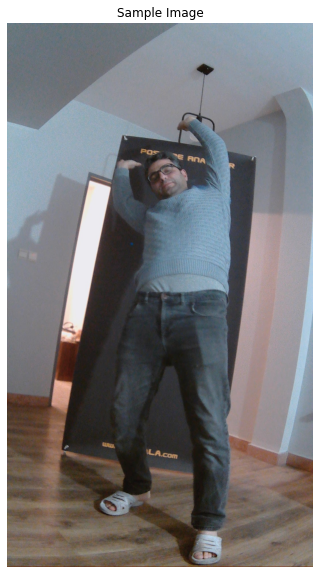

In [ ]:
# Read an image from the specified path.
sample_img = cv2.imread("/bin/1232.jpg")

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display. 
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

NOSE:
x: 0.5242961049079895
y: 0.28451621532440186
z: -0.037141237407922745
visibility: 0.9993651509284973

LEFT_EYE_INNER:
x: 0.5277454257011414
y: 0.2750532031059265
z: -0.019654152914881706
visibility: 0.9985322952270508



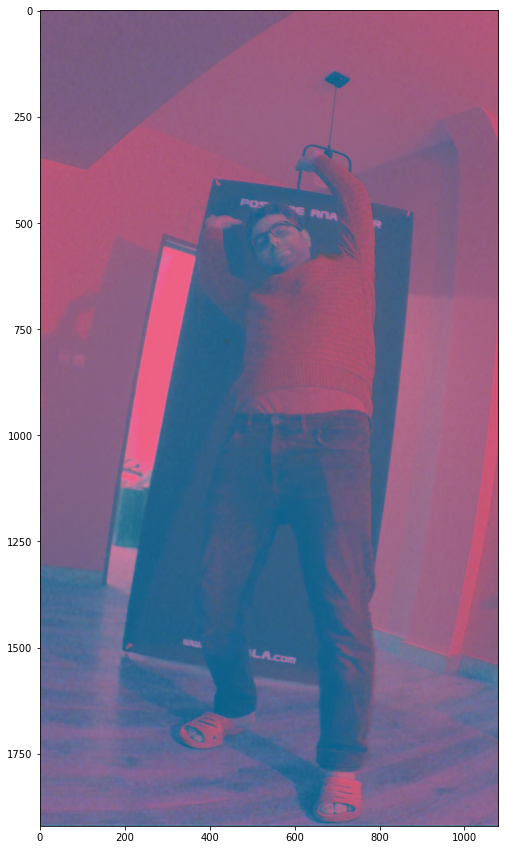

In [ ]:
from google.colab.patches import cv2_imshow
# Perform pose detection after converting the image into RGB format.
image_test = cv2.cvtColor(sample_img, cv2.COLOR_BGR2LUV)



plt.figure(figsize = [15, 15])
plt.imshow(image_test)
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2LUV))

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

In [ ]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmark.
    for i in range(4):
        print(image_width,image_height)
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

1080 1920
NOSE:
x: 566.2397933006287
y: 546.2711334228516
z: -40.112536400556564
visibility: 0.9993651509284973

1080 1920
LEFT_EYE_INNER:
x: 569.9650597572327
y: 528.1021499633789
z: -21.226485148072243
visibility: 0.9985322952270508

1080 1920
LEFT_EYE:
x: 579.072425365448
y: 524.1909027099609
z: -21.716689690947533
visibility: 0.9981645941734314

1080 1920
LEFT_EYE_OUTER:
x: 587.293438911438
y: 520.957145690918
z: -21.63564808666706
visibility: 0.9988874793052673



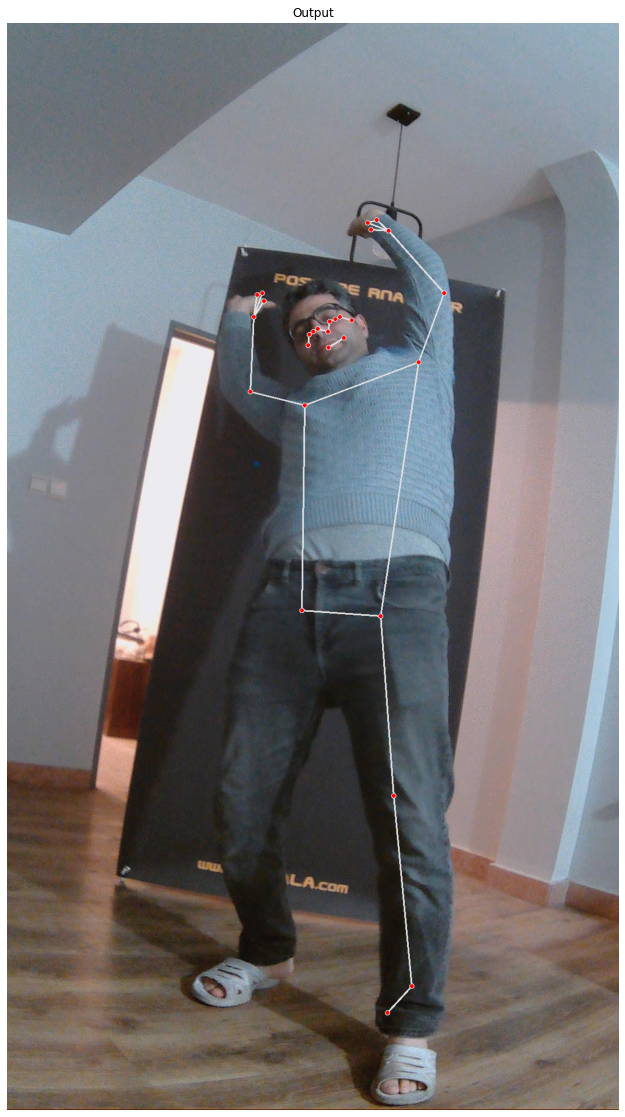

In [ ]:
# Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # Specify a size of the figure.
    fig = plt.figure(figsize = [20, 20])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

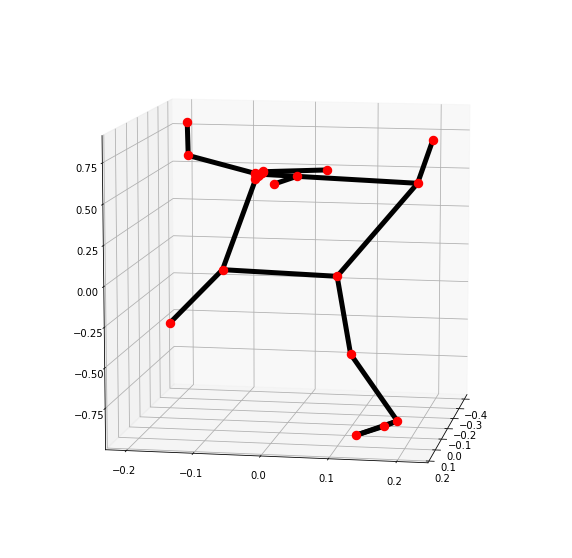

In [ ]:
# Plot Pose landmarks in 3D.
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)